<a href="https://colab.research.google.com/github/BrandonPalacios/House_Prices_Predictive_Model/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análisis Predictivo del Precio de la Vivienda

## Predictive Regression Model

### Brandon Uriel Palacios Méndez

## Fase 1. **Recolección de Datos**
Importamos el dataset desde Kaggle.

In [ ]:
# Configuramos importación desde Kaggle
from google.colab import files
!pip install -q kaggle

In [ ]:
# Subimos kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Movemos el archivo a la ubicación correcta.
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
# Descargamos dataset
!kaggle datasets download -d shree1992/housedata

housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Descomprimimos el datset
!unzip housedata.zip

Archive:  housedata.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace data.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.dat                
replace output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: output.csv              


## Fase 2. **Exploración del Dataset**

### Fase 2.1 **Exploración del dataframe**

In [ ]:
# Importamos las librearias de procesamiento de datos y algebra lineal.
import pandas as pd
import numpy as np

In [ ]:
# Creamos la variable con el dataset
house_data = pd.read_csv('data.csv')

In [ ]:
# Visualizamos el dataset de manera general para conocerlo
house_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# Examinamos las primeras lineas del dataset
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Consultamos datos estadísticos generales: número de elementos, media, desviación, valor mínimo, percentiles
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


Podemos observar que solo obtuvimos datos estadísticos de 13 de las 17 columnas del dataframe, lo cuál nos idica que existen variables de tipo Object, lo cual se revisará a continuación.

In [ ]:
# Consultamos el tipo de variables del dataset
house_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Comprobamos que existen columnas del tipo Object, las cuales podemos utilizar dentro de nuestras hipótesis.

In [ ]:
# Revisamos información general del dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

De las 18 columnas, 5 son del tipo `object`. El resto son del tipo `int64`y `float64`.

In [ ]:
# Consultamos el número de filas y columnas
house_data.shape

(4600, 18)

In [ ]:
# Revisamos el nombre de las columnas
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Consultamos si tenemos celdas sin valor
house_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Observamos que el dataset no tiene celdas sin valor y podemos comenzar a trabajar con él.

### Fase 2.2 **Exploración Visual**

In [ ]:
# Instalamos las librerías visuales
import matplotlib.pyplot as plt
import seaborn as sns

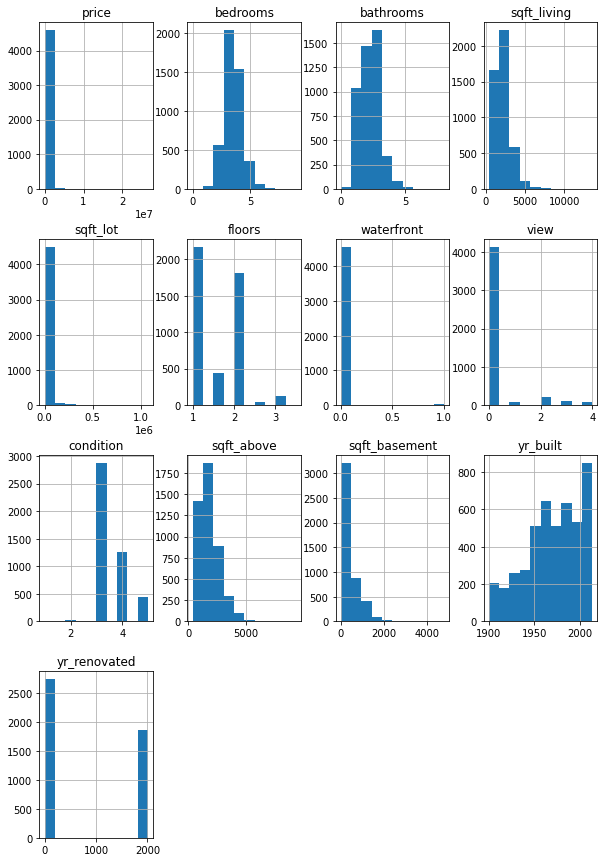

In [ ]:
# Visualizamos un histograma por cada variable cuantitativa
house_data.hist(figsize=(10,15))
plt.show()

**Los principales insights que podemos obtener de los histogramas es lo siguiente:**

*   La mayoría de las viviendas cuentan con más de 3 recámaras y muy pocas superan las 5 recámaras.
*   La mayoría de las viviendas tienen entre 1 y 3 baños.
*   Las viviendas tienen en promedio 1 y 2 habitaciones.
*   Las viviendas han sido construidas entre 1950 y el año 2000, sin embargo, una parte ha sido remodelada en el años 2000.





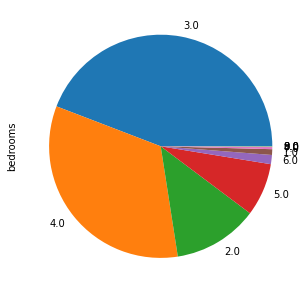

In [ ]:
# Obtenemos gráficas circulares de los principales variables.
house_data['bedrooms'].value_counts().plot(kind='pie', figsize=(5,10))

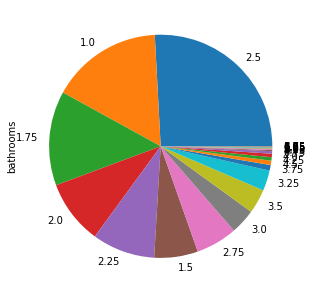

In [ ]:
house_data['bathrooms'].value_counts().plot(kind='pie', figsize=(5,10))

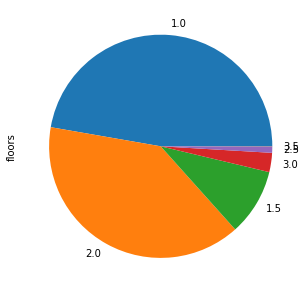

In [ ]:
house_data['floors'].value_counts().plot(kind='pie', figsize=(5,10))

Estas gráficas nos permiten rectificar la información extraída de los histograma, pues podemos apreciar la distribución de las recamaras siendo 3 y 4 las más frecuentes.
Los baños se encuentran más distribuidos, sin embargo, la mayor distribución es entre 1 y 2.5 baños, mientras que los pisos de las viviendas se distribuyen entre 1 y 2.


In [ ]:
# Analizamos la distribucón de viviendas por ciudad con la función groupby y la almacenamos en una nueva variable para visualizar un gráfico nuevo
ciudades = (
    house_data
    .groupby('city', as_index=False)
    .agg(houses_per_city=('city', 'count'))
    .sort_values('houses_per_city', ascending=False)
)
ciudades

,city,houses_per_city
35,Seattle,1573
32,Renton,293
3,Bellevue,286
31,Redmond,235
16,Issaquah,187
19,Kirkland,187
18,Kent,185
1,Auburn,176
33,Sammamish,175
14,Federal Way,148


<BarContainer object of 44 artists>

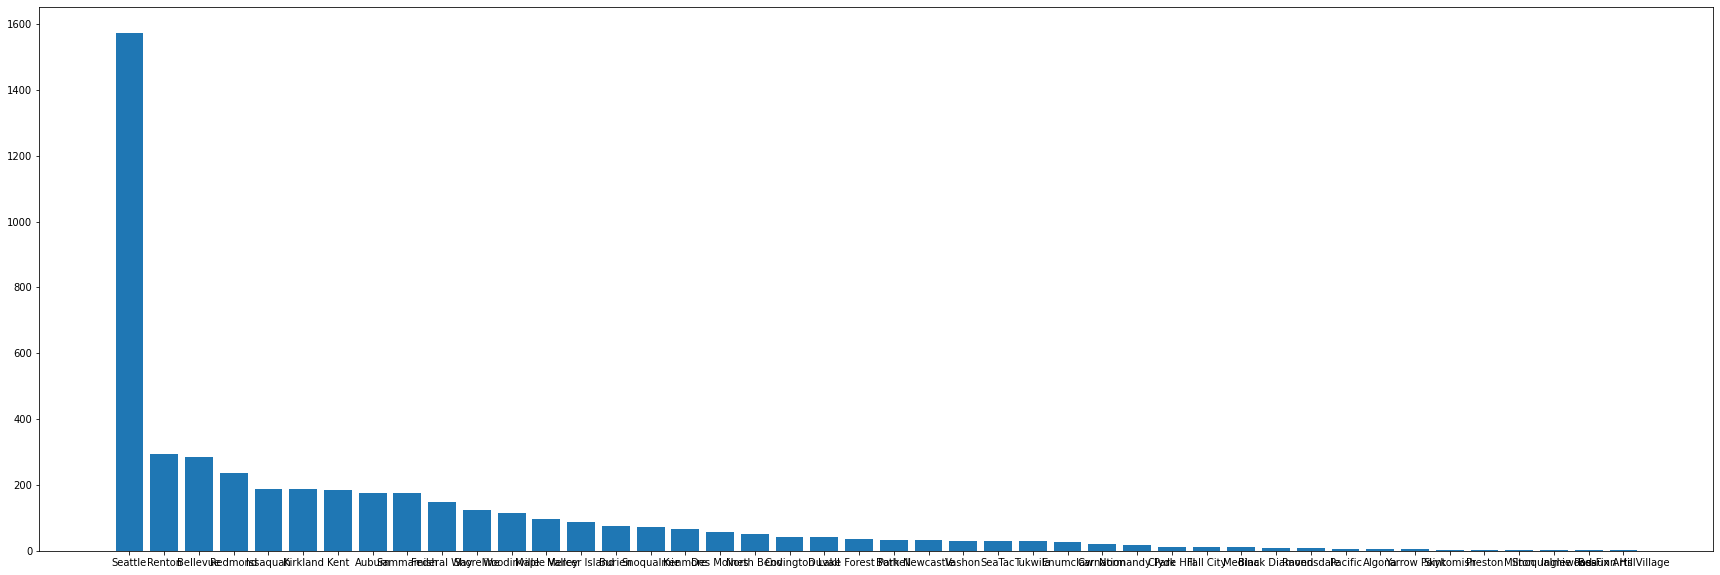

In [ ]:
#  Comparamos con un gráfico de barras
plt.figure(figsize=(30,10))
plt.bar(ciudades.city, ciudades.houses_per_city)

**La mayoría de las viviendas se encuentran en Seattle.**

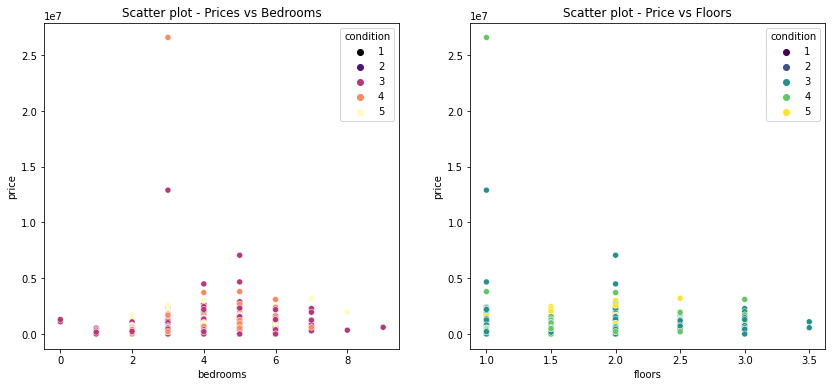

In [ ]:
# Visualizamos la variable price vs número de recámaras y elnúmero de pisos
f=  plt.figure(figsize=(14,6))
ax= f.add_subplot(121)
sns.scatterplot (x= 'bedrooms', y= 'price', data= house_data, palette= 'magma', hue= 'condition', ax= ax)
ax.set_title('Scatter plot - Prices vs Bedrooms')

ax= f.add_subplot(122)
sns.scatterplot(x= 'floors', y= 'price', data= house_data, palette= 'viridis', hue= 'condition')
ax.set_title('Scatter plot - Price vs Floors')
plt.savefig('sc.png')

**Las gráficas de dispersión que se muestran hacen referencia a qué tanto se ve afectado el precio de la vivienda por el número de recámaras y el número de pisos que tiene cada uno, sin embargo, podemos observar que estás variables no influyen mucho en el precio, pues la mayoría se encuentran en un rango similar.**

En la gráfica izquierda, vemos como los precios aumentan en las casas que tienen de 4 a 6 recámaras y que tienen una condición de 3 a 5.

En la gráfica derecha, los precios se distribuyen más uniformemente entre 1 a 2.5 pisos en las viviendas de igual manera, destacan las viviendas con una condición de 3 a 5.

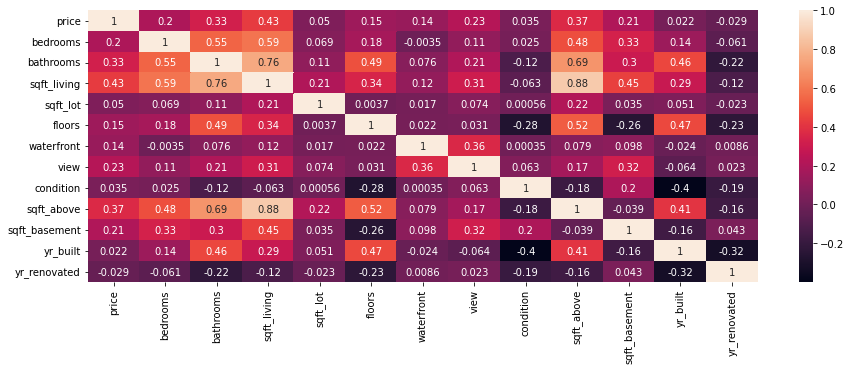

In [ ]:
# Realizamos un estudio de correlación entre las variables
corr= house_data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot= True);

**Este análisis de correlación nos arroja varias conclusiones interesantes:**

En general, nuetras variables principales no muestran una correlación visible, lo cual es un signo de confianza para continuar trabajando con nuestro dataset, sin embargo, hay algunas variables que hacen algo de "ruido" como lo son la relación entre las variables `sqft_above` y `sqft_living` con una correlación de 0.88 (muy alta); además de la relación entre `sqft_living` y `barthrooms` con un coef de correlación de 0.76 (alta); por último, la relación entre `sqft_above` y `bathrooms`.

Nos podemos dar cuenta que las únicas columnas con coeficiente de correlación alto son las anteriores, por lo que, con el fin de mejorar el modelo podemos considerar eliminar las variables `sqft_above` y `sqft_living` conservando la variable `bathrooms` en una de nuestras hipótesis. 

## Fase 3. Entrenamiento y Validación


### **Hipótesis 1. Utilizar únicamente variable numéricas**

In [ ]:
# Preparamos el dataset de la hipótesis 1
# Borramos las columnas categóricas
categorical_columns = ['date', 'street', 'city', 'statezip', 'country']
house_data_hipot1= house_data.drop(categorical_columns, axis=1)

In [ ]:
# Verificamos el dataset
house_data_hipot1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
# Preparamos las variables
x_hipot1= house_data_hipot1.drop('price', axis= 1) # Variables independientes
y_hipot1= house_data_hipot1['price'] # Variable dependiente

In [ ]:
# Preparamos train data y test data
from sklearn.model_selection import train_test_split
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot1_train, y_hipot1_train)

LinearRegression()

**Validación de Hipótesis 1**

In [ ]:
# Importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot1_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_train= mean_squared_error(y_true= y_hipot1_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_test= mean_squared_error(y_true= y_hipot1_test, y_pred= prediccion_test)
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))

MSE Train HIPO1 = 292440342188.2669
MSE Test HIPO1 = 74834240426.83386


**Conclusión Hipótesis 1**

Después de realizar la validación del modelo a través del Error Cuadrático Medio, notamos que nuestra hipótesis no nos sirve pues nuestros valores de evaluación salieron muy por encima de los valores aceptables. Por lo tanto, descartamos la hipótesis y utilizamos una nueva a continuación.

### **Hipótesis 2. Eliminamos las variables con una correlación mayor.**

In [ ]:
# Preparamos el dataset de la hipótesis 2
# Borramos las columnas categóricas
corr_columns = ['sqft_above', 'sqft_living']
house_data_hipot2 = house_data_hipot1.drop(corr_columns, axis=1)

In [ ]:
# Verificamos el dataset
house_data_hipot2.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,7912,1.5,0,0,3,0,1955,2005
1,2384000.0,5.0,2.50,9050,2.0,0,4,5,280,1921,0
2,342000.0,3.0,2.00,11947,1.0,0,0,4,0,1966,0
3,420000.0,3.0,2.25,8030,1.0,0,0,4,1000,1963,0
4,550000.0,4.0,2.50,10500,1.0,0,0,4,800,1976,1992


In [ ]:
# Preparamos las variables
x_hipot2= house_data_hipot2.drop('price', axis= 1) # Variables independientes
y_hipot2= house_data_hipot2['price'] # Variable dependiente

In [ ]:
# Preparamos train data y test data
from sklearn.model_selection import train_test_split
x_hipot2_train, x_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(x_hipot2, y_hipot2, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot2_train, y_hipot2_train)

LinearRegression()

**Validación de Hipótesis 2**

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot2_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_train= mean_squared_error(y_true= y_hipot2_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))
print('MSE Train HIPO2 = ' + str(mse_hipot2_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot2_test)
print()
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_test= mean_squared_error(y_true= y_hipot2_test, y_pred= prediccion_test)
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))
print('MSE Test HIPO2 = ' + str(mse_hipot2_test))

MSE Train HIPO1 = 292440342188.2669
MSE Train HIPO2 = 308788691335.693

MSE Test HIPO1 = 74834240426.83386
MSE Test HIPO2 = 105383714051.72208


**Conclusión Hipótesis 2**

Después de eliminar las variables que tenían un coeficiente más alto de correlación podemos ver que nuestro modelo no mejoró, por lo tanto, descartamos la hipótesis 2 y continuamos con una nueva.

### **Hipótesis 3. Transformamos las variables categóricas en variables numéricas**

Utilizamos la técnica de `one_hot_encoding` que permite asignar un valor de 0 y 1 a las variables categóricas.

In [ ]:
# Preparamos el dataset de la hipótesis 3
# Borramos las columnas categóricas
categorical_columns_2 = ['city']

In [ ]:
# Preparamos el dataset de la hipótesis 3
house_data_hipot3 = pd.get_dummies(data= house_data, prefix= 'OHE', prefix_sep= '_',
                columns = categorical_columns_2,
                drop_first= True,
                dtype= 'int8')

In [ ]:
# Verificamos el dataset
house_data_hipot3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,OHE_SeaTac,OHE_Seattle,OHE_Shoreline,OHE_Skykomish,OHE_Snoqualmie,OHE_Snoqualmie Pass,OHE_Tukwila,OHE_Vashon,OHE_Woodinville,OHE_Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Eliminamos las variables que no aportan al modelo.
categorical_columns_3 = ['date','street', 'statezip', 'country']
house_data_hipot3 = house_data_hipot3.drop(categorical_columns_3, axis=1)

In [ ]:
house_data_hipot3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,OHE_SeaTac,OHE_Seattle,OHE_Shoreline,OHE_Skykomish,OHE_Snoqualmie,OHE_Snoqualmie Pass,OHE_Tukwila,OHE_Vashon,OHE_Woodinville,OHE_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Preparamos las variables
x_hipot3= house_data_hipot3.drop('price', axis= 1) # Variables independientes
y_hipot3= house_data_hipot3['price'] # Variable dependiente

In [ ]:
# Preparamos train data y test data
from sklearn.model_selection import train_test_split
x_hipot3_train, x_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(x_hipot3, y_hipot3, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot3_train, y_hipot3_train)

LinearRegression()

**Validación Hipótesis 3**

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot3_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_train= mean_squared_error(y_true= y_hipot3_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))
print('MSE Train HIPO2 = ' + str(mse_hipot2_train))
print('MSE Train HIPO3 = ' + str(mse_hipot3_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot3_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_test= mean_squared_error(y_true= y_hipot3_test, y_pred= prediccion_test)
print()
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))
print('MSE Test HIPO2 = ' + str(mse_hipot2_test))
print('MSE Test HIPO3 = ' + str(mse_hipot3_test))

MSE Train HIPO1 = 292440342188.2669
MSE Train HIPO2 = 308788691335.693
MSE Train HIPO3 = 277018243131.47644

MSE Test HIPO1 = 74834240426.83386
MSE Test HIPO2 = 105383714051.72208
MSE Test HIPO3 = 59681723073.691025


**Conclusión Hipótesis 3**

Al realizar nuestra hipótesis número 3, podemos ver que al aplicar el método de `one_hot_encoding` pudimos mejorar un poco el modelo, sin embargo, nuestra métrica de evaluación (MSE) sigue estando muy por arriba del valor aceptable. Por lo que decidimos descartar el modelo y continuar con una nueva hipótesis.

### Hipótesis 4. Normalización de la variable objetivo utilizando StandardScaler.

In [ ]:
# Preparamos el dataset de la hipótesis 4
house_data_hipot4 = pd.get_dummies(data= house_data, prefix= 'OHE', prefix_sep= '_',
                columns = categorical_columns_2,
                drop_first= True,
                dtype= 'int8')

In [ ]:
# Eliminamos las variables que no aportan al modelo.
categorical_columns_3 = ['date','street', 'statezip', 'country']
house_data_hipot4 = house_data_hipot4.drop(categorical_columns_3, axis=1)

In [ ]:
# Preparamos las variables
x_hipot4= house_data_hipot4.drop('price', axis= 1) # Variables independientes
y_hipot4= house_data_hipot4['price'] # Variable dependiente

In [ ]:
# Escalamos la variable 'price' para hacerla más estándar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Los algoritmos de preprocessing de sklearn están preparados para convertir matrices por lo que tenemos que hacer una transformación de nuestra variable 'y'
# ya que es una variable de tipo 'Series'.
# Para ello hacemos un .to_numpy() que nos convierte la serie en una array y luego hacemos reshape (-1,1), que transforma un array de 1xn en una matriz de nx1
y_hipot4= scaler.fit_transform(y_hipot4.to_numpy().reshape(-1,1))
y_hipot4= y_hipot4.reshape(1,-1)[0]

In [ ]:
# Preparamos train data y test data
x_hipot4_train, x_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(x_hipot4, y_hipot4, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot4_train, y_hipot4_train)

LinearRegression()

**Validación de Hipótesis 4**

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot4_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_train= mean_squared_error(y_true= y_hipot4_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))
print('MSE Train HIPO2 = ' + str(mse_hipot2_train))
print('MSE Train HIPO3 = ' + str(mse_hipot3_train))
print('MSE Train HIPO4 = ' + str(mse_hipot4_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot4_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot4_test= mean_squared_error(y_true= y_hipot4_test, y_pred= prediccion_test)
print()
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))
print('MSE Test HIPO2 = ' + str(mse_hipot2_test))
print('MSE Test HIPO3 = ' + str(mse_hipot3_test))
print('MSE Test HIPO4 = ' + str(mse_hipot4_test))

MSE Train HIPO1 = 292440342188.2669
MSE Train HIPO2 = 308788691335.693
MSE Train HIPO3 = 277018243131.47644
MSE Train HIPO4 = 0.8715638098514225

MSE Test HIPO1 = 74834240426.83386
MSE Test HIPO2 = 105383714051.72208
MSE Test HIPO3 = 59681723073.691025
MSE Test HIPO4 = 0.18777257899173475


**Conclusión de Hipótesis 4**

Después de realizar un escalado estándar a nuestra variable dependiente, finalmente pudimos obtener un resultado óptimo para nuestra métrica (MSE), el cual se encuentra más cercano a 0 en comparación con los anteriores. Por lo tanto, afirmamos que nuestro modelo es óptimo para predecir el precio de la vivienda.

Sin embargo, realizaremos un par de hipótesis más con el fin de comprobar que tenemos el mejor modelo disponible.

### Hipótesis 5. Normalización de la variable objetivo utilizando MaxAbsScaler.

In [ ]:
# Preparamos el dataset de la hipótesis 5
house_data_hipot5 = pd.get_dummies(data= house_data, prefix= 'OHE', prefix_sep= '_',
                columns = categorical_columns_2,
                drop_first= True,
                dtype= 'int8')

In [ ]:
# Eliminamos las variables que no aportan al modelo.
categorical_columns_3 = ['date','street', 'statezip', 'country']
house_data_hipot5 = house_data_hipot5.drop(categorical_columns_3, axis=1)

In [ ]:
# Escalamos los datos
from sklearn.preprocessing import MaxAbsScaler
scaler= MaxAbsScaler()
house_data_hipot5[['price']] = scaler.fit_transform(house_data_hipot5[['price']])

In [ ]:
# Preparamos las variables
x_hipot5= house_data_hipot5.drop('price', axis= 1) # Variables independientes
y_hipot5= house_data_hipot5['price'] # Variable dependiente

In [ ]:
# Preparamos train data y test data
x_hipot5_train, x_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(x_hipot5, y_hipot5, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot5_train, y_hipot5_train)

LinearRegression()

**Validación Hipótesis 5**

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot5_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_train= mean_squared_error(y_true= y_hipot5_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))
print('MSE Train HIPO2 = ' + str(mse_hipot2_train))
print('MSE Train HIPO3 = ' + str(mse_hipot3_train))
print('MSE Train HIPO4 = ' + str(mse_hipot4_train))
print('MSE Train HIPO5 = ' + str(mse_hipot5_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot5_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot5_test= mean_squared_error(y_true= y_hipot5_test, y_pred= prediccion_test)
print()
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))
print('MSE Test HIPO2 = ' + str(mse_hipot2_test))
print('MSE Test HIPO3 = ' + str(mse_hipot3_test))
print('MSE Test HIPO4 = ' + str(mse_hipot4_test))
print('MSE Test HIPO5 = ' + str(mse_hipot5_test))

MSE Train HIPO1 = 292440342188.2669
MSE Train HIPO2 = 308788691335.693
MSE Train HIPO3 = 277018243131.47644
MSE Train HIPO4 = 0.8715638098514225
MSE Train HIPO5 = 0.0003918065535605678

MSE Test HIPO1 = 74834240426.83386
MSE Test HIPO2 = 105383714051.72208
MSE Test HIPO3 = 59681723073.691025
MSE Test HIPO4 = 0.18777257899173475
MSE Test HIPO5 = 8.441209489929607e-05


**Conclusión de Hipótesis 5**

Al realizar el escalado con `MaxAbsScaler` obtuvimos resltados muy interesantes:

El error cuadrático medio nos arrojó un valor excelente en la predicción de entrenamiento, sin embargo, en la la predicción del test nos dió un MSE muy por arriba de lo acpetable, lo cual podría indicar que nuestro modelo tiene un problema de 'underfitting' es decir el entrenamiento pudo no haber sido suficiente para realizar el test.

Por lo tanto, nuestra hipótesis 4 sigue siendo el mejor modelo disponible.

### Hipótesis 6. Normalización de la variable objetivo utilizando RobustScaler.

Fuente: [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

In [ ]:
# Preparamos el dataset de la hipótesis 6
house_data_hipot6 = pd.get_dummies(data= house_data, prefix= 'OHE', prefix_sep= '_',
                columns = categorical_columns_2,
                drop_first= True,
                dtype= 'int8')

In [ ]:
# Eliminamos las variables que no aportan al modelo.
categorical_columns_3 = ['date','street', 'statezip', 'country']
house_data_hipot6 = house_data_hipot6.drop(categorical_columns_3, axis=1)

In [ ]:
# Escalamos los datos
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
house_data_hipot6[['price']] = scaler.fit_transform(house_data_hipot6[['price']])

In [ ]:
# Preparamos las variables
x_hipot6= house_data_hipot6.drop('price', axis= 1) # Variables independientes
y_hipot6= house_data_hipot6['price'] # Variable dependiente

In [ ]:
# Preparamos train data y test data
x_hipot6_train, x_hipot6_test, y_hipot6_train, y_hipot6_test = train_test_split(x_hipot6, y_hipot6, test_size= 0.20, random_state=43)

In [ ]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
regresion_lineal= LinearRegression()
regresion_lineal.fit(x_hipot6_train, y_hipot6_train)

LinearRegression()

**Validación de Hipótesis 6**

In [ ]:
# Predecimos los valores 'y' para los datos usados en el entrenamiento
prediccion_entrenamiento= regresion_lineal.predict(x_hipot6_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot6_train= mean_squared_error(y_true= y_hipot6_train, y_pred= prediccion_entrenamiento)
print('MSE Train HIPO1 = ' + str(mse_hipot1_train))
print('MSE Train HIPO2 = ' + str(mse_hipot2_train))
print('MSE Train HIPO3 = ' + str(mse_hipot3_train))
print('MSE Train HIPO4 = ' + str(mse_hipot4_train))
print('MSE Train HIPO5 = ' + str(mse_hipot5_train))
print('MSE Train HIPO6 = ' + str(mse_hipot6_train))

# Predecimos los valores 'y' para los datos usados en el test
prediccion_test= regresion_lineal.predict(x_hipot6_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot6_test= mean_squared_error(y_true= y_hipot6_test, y_pred= prediccion_test)
print()
print('MSE Test HIPO1 = ' + str(mse_hipot1_test))
print('MSE Test HIPO2 = ' + str(mse_hipot2_test))
print('MSE Test HIPO3 = ' + str(mse_hipot3_test))
print('MSE Test HIPO4 = ' + str(mse_hipot4_test))
print('MSE Test HIPO5 = ' + str(mse_hipot5_test))
print('MSE Test HIPO6 = ' + str(mse_hipot6_test))

MSE Train HIPO1 = 292440342188.2669
MSE Train HIPO2 = 308788691335.693
MSE Train HIPO3 = 277018243131.47644
MSE Train HIPO4 = 0.8715638098514225
MSE Train HIPO5 = 0.0003918065535605678
MSE Train HIPO6 = 2.5119055939241197

MSE Test HIPO1 = 74834240426.83386
MSE Test HIPO2 = 105383714051.72208
MSE Test HIPO3 = 59681723073.691025
MSE Test HIPO4 = 0.18777257899173475
MSE Test HIPO5 = 8.441209489929607e-05
MSE Test HIPO6 = 0.5411732178685178


**Conclusión Hipótesis 6**

Al utilizar un escalado diferente (`RobustScaler`) obtuvimos un resultado inverso al que obtuvimos con `MaxAbsScaler` pues ahora el MSE en la predicción de entrenamiento se encuentra por encima de los aceptable pero la predicción del test nos dió un valor muy bueno.

Esto nos da la idea de que nuestro modelo pueda tener un problema de 'Overfitting' es decir que es que nuestro modelo está sobre ajustado y no tiene la capacidad de realizar la predicción correctamente.

Dicho esto, descartamos la hipótesis.



## Conclusión General

Después de analizar 6 diferentes hipótesis y obtener resultados nuevos y muy interesantes, considero que el modelo más apropiado para predecir el precio de la vivienda es el de la hipótesis 4, utilizando un `StandardScaler` ya que este nos arrojó las mejores métricas para ambos escenarios y se encuentran dentro de un rango aceptable. 